# <font color=red>**Charts**</font>

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://matplotlib.org/contents.html
* https://github.com/matplotlib/mplfinance

### Install pandas_datareader

* https://pydata.github.io/pandas-datareader/


In [1]:
!pip install pandas_datareader
!pip install seaborn
!pip install mplfinance

In [2]:
import pandas_datareader as pdr
import pandas as pd

# data_source: yahoo, quandl (https://www.quandl.com/)
stock = pdr.DataReader('0700.hk', start='2000', data_source='yahoo')
stock
# stock['Volume']


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-06-16,0.925,0.815,0.875,0.830,2.198875e+09,0.745515
2004-06-17,0.875,0.825,0.830,0.845,4.190075e+08,0.758989
2004-06-18,0.850,0.790,0.840,0.805,1.829900e+08,0.723060
2004-06-21,0.825,0.790,0.820,0.800,1.140850e+08,0.718569
2004-06-23,0.890,0.805,0.810,0.885,2.750800e+08,0.794917
...,...,...,...,...,...,...
2020-09-24,512.000,505.000,510.000,505.000,1.434697e+07,505.000000
2020-09-25,511.500,502.000,510.000,503.500,1.322713e+07,503.500000
2020-09-28,509.500,503.500,505.000,506.000,1.093996e+07,506.000000


In [3]:
# stock.index
# stock.Close.index

# by label based indexer (loc)
# stock.loc['2020'] # dataframe
# stock.loc['2020-1':'2020-8'] # dataframe
# stock['2020']

# stock.Close['2020-1':'2020-8'] # summer
# stock.Close['2020-1':'2020-8'].plot()

##### Resample based on a frequency (something like groupby a frequency)
* Frequency: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

##### plot doc
+ https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

<AxesSubplot:xlabel='Date'>

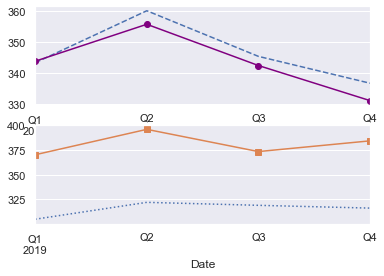

In [4]:
# stock.Close.resample('W') # DatetimeIndexResampler -> do aggregate function

# stock.Close.resample('W').mean() # resample every
# stock.Close['2020-1'].resample('B').max() # B: business day (mon - friday), max price of each business day
# stock.Close['2020'].resample('W').mean() # W: week, average price of each week
# stock.Close['2020'].resample('Q').mean() # Q: quarter end, average price of each quarter
# stock.Close['2020'].resample('M').mean() # M: month end
# stock.Close.resample('BA').mean().head() # BA: business year end, average price of each year

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

fig, ax = plt.subplots(2) # row, col

stock.Close['2019'].resample('Q').mean().plot(ax=ax[0], style='--')
stock.Close['2019'].resample('Q').median().plot(ax=ax[0], color='purple', marker='o') # purple color

stock.Close['2019'].resample('Q').min().plot(ax=ax[1], style=':')
stock.Close['2019'].resample('Q').max().plot(ax=ax[1], style='s-')


##### Change Frequency (變更頻率):  asfreq()
+ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html

##### plot doc
+ https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

<AxesSubplot:title={'center':'Change frequency plot'}, xlabel='Date'>

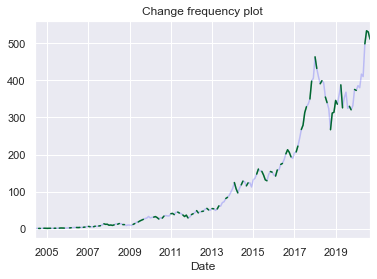

In [5]:
# stock.asfreq('Q') # change frequency to quarter
# stock.asfreq('M') # change frequency to month, return a dataframe

stock.asfreq('M', ).Close.plot(color='green', title='Change frequency plot')
stock.asfreq('M', method='ffill').Close.plot(color='blue', title='Change frequency plot', alpha=0.2)
# stock.asfreq('M', method='bfill').Close.plot(color='red', marker="o", title='Change frequency plot')


##### Shift data: shift() 

<AxesSubplot:xlabel='Date'>

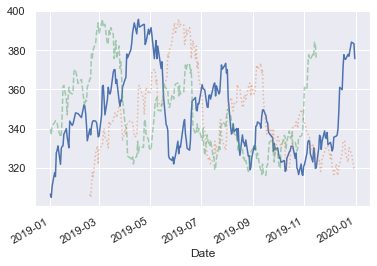

In [6]:
# stock.loc['2019'].Close.shift(3) # shift forward, fill NaN
# stock.loc['2019'].Close.shift(2, fill_value='0') # shift forward, fill with a value

stock.loc['2019'].Close.plot() # normal
stock.loc['2019'].Close.shift(30).plot(style=':', alpha=0.5) # shift forward
stock.loc['2019'].Close.shift(-30).plot(style='--', alpha=0.5) # shift backward



##### Moving Average

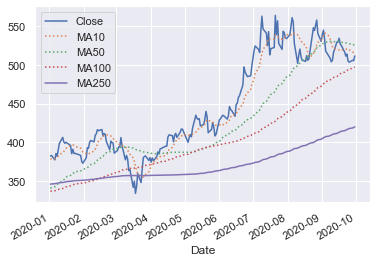

In [7]:
# stock['MA100'] = stock.Close.rolling(window=100).mean()
stock['MA10'] = stock.Close.rolling(window=10).mean()
stock['MA50'] = stock.Close.rolling(window=50).mean()
stock['MA100'] = stock.Close.rolling(window=100).mean()
stock['MA250'] = stock.Close.rolling(window=250).mean()

stock['2020'].Close.plot()
stock['2020'].MA10.plot(style=':')
stock['2020'].MA50.plot(style=':')
stock['2020'].MA100.plot(style=':')
stock['2020'].MA250.plot()

plt.legend(['Close', 'MA10', 'MA50', 'MA100', 'MA250'])


* https://bit.ly/33fCl6L

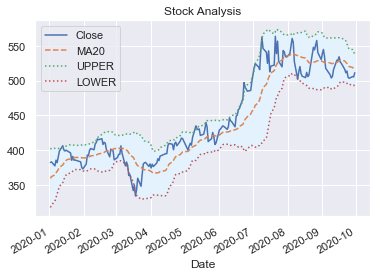

In [8]:
def bband(price, maSize, numStd):

    mean = price.rolling(window=maSize).mean()
    std = price.rolling(window=maSize).std()
    upper = mean + (std * numStd)
    lower = mean - (std * numStd)

    return mean, upper, lower


stock['MA20'], stock['UPPER'], stock['LOWER'] = bband(stock.Close, 20, 2)

stock.loc['2020':, ['Close', 'MA20','UPPER', 'LOWER']].plot(style=['-','--', ':', ':'], title='Stock Analysis')

plt.fill_between(stock.loc['2020':].index, stock.loc['2020':].UPPER, stock.loc['2020':].LOWER, color='#E3F2FD')

##### Candlestick chart 
+ https://github.com/matplotlib/mplfinance

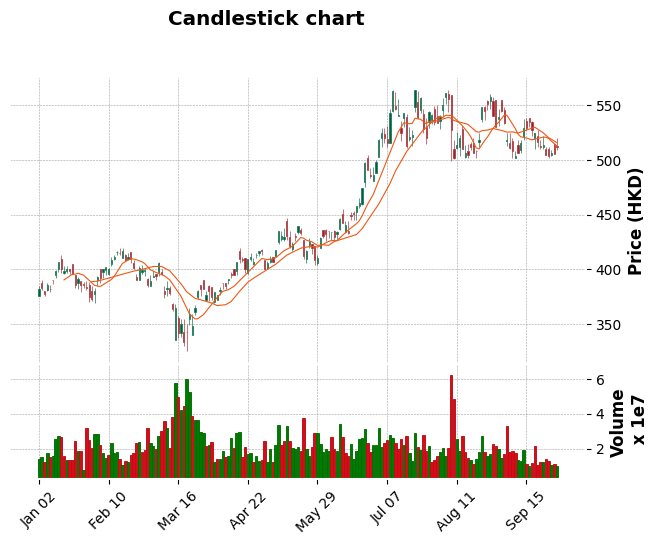

In [9]:
import mplfinance as mpf

mpf.plot(stock['2020'], type='candle', style='charles', title='Candlestick chart',
            ylabel='Price (HKD)',
            ylabel_lower='Volume',
            volume=True, 
            mav=(10,20))


##### Other useful methods

<AxesSubplot:xlabel='Date'>

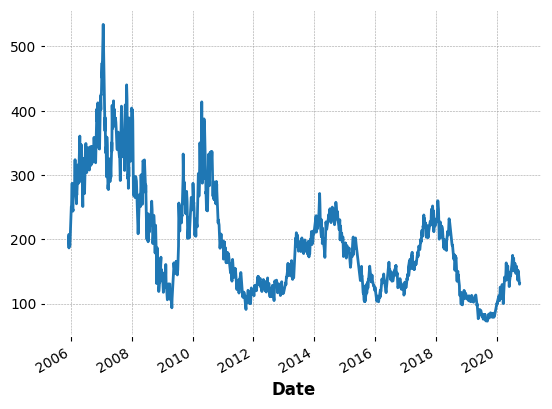

In [10]:
stock.Close.pct_change() # percentage change between the current close and previous close

stock.Close.shift(365) # last year price (data shifted forward for 365 days)
(stock.Close / stock.Close.shift(365) * 100).plot() # (comparing the price)



##### Comparing different stocks in %

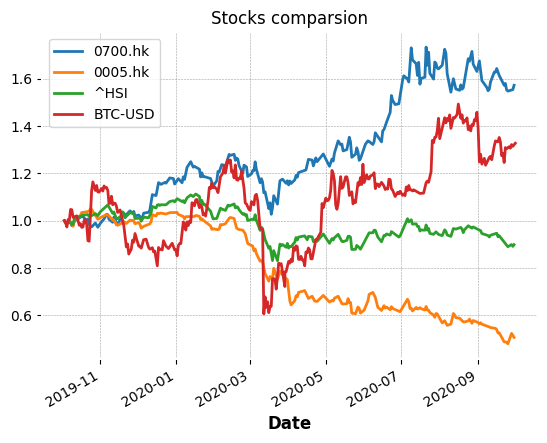

In [13]:
def stockDF(ticker):
    stock = pdr.DataReader(ticker, start='2015', data_source='yahoo')
    return stock

def compareStockReturnCharts(watchList, years=3):
    for i, code in enumerate(watchList):
        df = stockDF(code) 
        # stock price for each stock is different
        # divide last N years price to make sure all start from 1
        nYearAgoToday = pd.Timestamp.today() - pd.Timedelta(days=365*years) 
        dfNY = df.query('index > @nYearAgoToday') # get relevant records
        lastYearPrice = dfNY.iloc[0].Close # get price of that day
        (dfNY['Close'] / lastYearPrice).plot(title='Stocks comparsion')
        
    plt.legend(watchList)

watchList = ['0700.hk', '0005.hk', '^HSI', 'BTC-USD'] # comparing stock in %, all start from 1
compareStockReturnCharts(watchList, years=1)


